# Sentiment Analysis
https://huggingface.co/cardiffnlp/twitter-roberta-large-topic-sentiment-latest

- on expanded prompts
- per prompt
- aggregate per user, then per gender
- can later be correlated with code quality on the prompt level

### Problems:
- "Have fun and good luck!" gets positivity score of 0.98 but is a part of a copied assignment paper and is an errror from the parsing process
- "Some prompts may only contain code, some only conversational text, the some only other parts, and some of them a mix of components." is still a leaked system prompt
- "I am using datalore and I think I cannot install things." gets a negativity score of 0.81 but its actually neutral. "Why are the values so weird? because it is scaled?" get a negativity score of 0.7 but is definitely more negative.
- "Please make it tougher, I am not a baby." gets 0.69 but should be even more negative
- "I added a new plot-expanded functionality in abalone, but my import does not seem to recognize the new version of abalone.com Analytical It gives me this error to attributeErrorErrorError 1A abalone object has no attribute \'plotexpanded\'\'." gets high negativity but is neutral

## -> Mask out signal words that are neutral instead of negative in this context ("error")
## --> Mask out code parts entirely to maintain syntactical structure?
## --> use an LLM and apply different prompts or provide few shot examples?

In [3]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../../giicg.db")
prompts = pd.read_sql("Select * from expanded_prompts", conn)
conn.close()
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en
...,...,...,...,...,...,...,...,...,...,...
755,724,31,user,import pandas as pd\nimport numpy as np\nfrom ...,Please replace my retrieval pipeline here with...,import pandas as pd\nimport numpy as np\nfrom ...,You are tasked with separating user prompts in...,Man (cisgender),92,en
756,726,31,user,"please update my code accordingly, no comments...","please update my code accordingly, no comments...",,,Man (cisgender),92,en
757,1131,54,user,import pandas as pd\nimport numpy as np\nfrom ...,"I want to tune optimal thresholds. Currently, ...",import pandas as pd\nimport numpy as np\nfrom ...,The narratives list looks like this:\nnarrativ...,Man (cisgender),92,en
758,1532,71,user,"from transformers import AutoTokenizer, AutoMo...",I want to use an LLM for listwise reranking in...,"from transformers import AutoTokenizer, AutoMo...",,Man (cisgender),92,en


In [4]:
from helpers.normalization import remove_punctuation_and_newlines

prompts['conversational'] = prompts['conversational'].apply(remove_punctuation_and_newlines)
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language
0,1,1,user,"parsing data from python iterator, how it coul...",parsing data from python iterator how it could...,,,Man (cisgender),6,en
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en
...,...,...,...,...,...,...,...,...,...,...
755,724,31,user,import pandas as pd\nimport numpy as np\nfrom ...,Please replace my retrieval pipeline here with...,import pandas as pd\nimport numpy as np\nfrom ...,You are tasked with separating user prompts in...,Man (cisgender),92,en
756,726,31,user,"please update my code accordingly, no comments...",please update my code accordingly no comments ...,,,Man (cisgender),92,en
757,1131,54,user,import pandas as pd\nimport numpy as np\nfrom ...,I want to tune optimal thresholds Currently I ...,import pandas as pd\nimport numpy as np\nfrom ...,The narratives list looks like this:\nnarrativ...,Man (cisgender),92,en
758,1532,71,user,"from transformers import AutoTokenizer, AutoMo...",I want to use an LLM for listwise reranking in...,"from transformers import AutoTokenizer, AutoMo...",,Man (cisgender),92,en


In [5]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from scipy.special import softmax
import torch

def load_model(path):
    tokenizer = AutoTokenizer.from_pretrained(path)
    config = AutoConfig.from_pretrained(path)
    model = AutoModelForSequenceClassification.from_pretrained(path)
    model.save_pretrained(path)
    tokenizer.save_pretrained(path)
    return model, tokenizer, config

def analyze_sentiment(text, model, tokenizer, max_length=512):
    """
    Analyze sentiment of text with proper length handling
    """
    try:
        # Ensure text is a string and handle empty/None values
        if not text or not isinstance(text, str):
            return [0.33, 0.33, 0.34]  # neutral default

        # Tokenize with proper truncation and padding
        encoded_input = tokenizer(
            text,
            return_tensors='pt',
            max_length=max_length,
            truncation=True,
            padding=True
        )

        # Run the model
        with torch.no_grad():  # Disable gradient computation for efficiency
            output = model(**encoded_input)

        # Extract logits and apply softmax
        logits = output.logits[0].detach().numpy()
        scores = softmax(logits)

        return scores.tolist()

    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return [0.33, 0.33, 0.34]  # neutral default on error


def process_row(text):
    scores = analyze_sentiment(text, model, tokenizer)
    return pd.Series(scores, index=['negative', 'neutral', 'positive'])


path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
model, tokenizer, config = load_model(path)
prompts[['negative', 'neutral', 'positive']] = prompts['conversational'].apply(process_row)

prompts


,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,negative,neutral,positive
0,1,1,user,"parsing data from python iterator, how it coul...",parsing data from python iterator how it could...,,,Man (cisgender),6,en,0.029543,0.886627,0.083830
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en,0.020289,0.916682,0.063029
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,0.289665,0.645016,0.065319
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,0.511837,0.444185,0.043978
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en,0.063254,0.869137,0.067609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,724,31,user,import pandas as pd\nimport numpy as np\nfrom ...,Please replace my retrieval pipeline here with...,import pandas as pd\nimport numpy as np\nfrom ...,You are tasked with separating user prompts in...,Man (cisgender),92,en,0.191832,0.747300,0.060868
756,726,31,user,"please update my code accordingly, no comments...",please update my code accordingly no comments ...,,,Man (cisgender),92,en,0.149495,0.762197,0.088308
757,1131,54,user,import pandas as pd\nimport numpy as np\nfrom ...,I want to tune optimal thresholds Currently I ...,import pandas as pd\nimport numpy as np\nfrom ...,The narratives list looks like this:\nnarrativ...,Man (cisgender),92,en,0.511362,0.405478,0.083159
758,1532,71,user,"from transformers import AutoTokenizer, AutoMo...",I want to use an LLM for listwise reranking in...,"from transformers import AutoTokenizer, AutoMo...",,Man (cisgender),92,en,0.203858,0.757606,0.038536


## Average per user

In [6]:
mean_user_scores = prompts.groupby(['user_id', 'gender'])[['negative', 'neutral', 'positive']].mean().reset_index()
mean_user_scores

,user_id,gender,negative,neutral,positive
0,6,Man (cisgender),0.132082,0.801892,0.066026
1,11,Woman (cisgender),0.246952,0.714687,0.038362
2,15,Man (cisgender),0.504522,0.461838,0.033640
3,16,Woman (cisgender),0.141142,0.704257,0.154601
4,25,Man (cisgender),0.045159,0.884136,0.070705
5,28,Woman (cisgender),0.168967,0.624133,0.206900
6,30,Non-binary,0.301696,0.617728,0.080577
7,31,Man (cisgender),0.084337,0.872093,0.043570
8,34,Man (cisgender),0.259065,0.688071,0.052864
9,46,Man (cisgender),0.220379,0.745579,0.034043


## Average per gender on user base

In [7]:
mean_gender_user_scores = mean_user_scores.groupby('gender')[['negative', 'neutral', 'positive']].mean().reset_index()
mean_gender_user_scores

,gender,negative,neutral,positive
0,Another gender,0.145738,0.798971,0.055292
1,Man (cisgender),0.215863,0.707842,0.076295
2,Non-binary,0.301696,0.617728,0.080577
3,Woman (cisgender),0.170514,0.710701,0.118785


In [8]:

from helpers.statistical_tests import run_t_test_on_gender

run_t_test_on_gender(mean_user_scores, 'positive')
run_t_test_on_gender(mean_user_scores, 'neutral')
run_t_test_on_gender(mean_user_scores, 'negative')

T-statistic: -1.8737, p-value: 0.0794
T-statistic: -0.0664, p-value: 0.9477
T-statistic: 1.1457, p-value: 0.2664


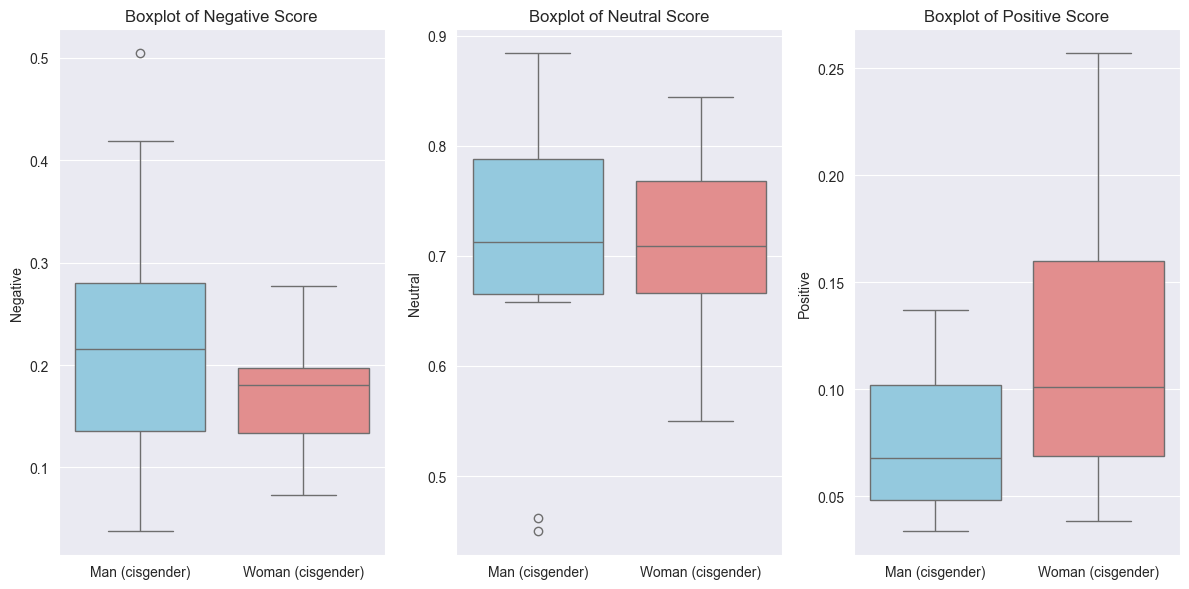

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered = mean_user_scores[mean_user_scores['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]
score_types = ['negative', 'neutral', 'positive']

plt.figure(figsize=(12, 6))

for i, score in enumerate(score_types):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        x='gender',
        y=score,
        hue='gender',
        data=filtered,
        palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'},
        legend=False
    )
    plt.title(f'Boxplot of {score.capitalize()} Score')
    plt.xlabel('')
    plt.ylabel(score.capitalize())
    plt.legend([],[], frameon=False)  # Remove the redundant legend

plt.tight_layout()
plt.show()


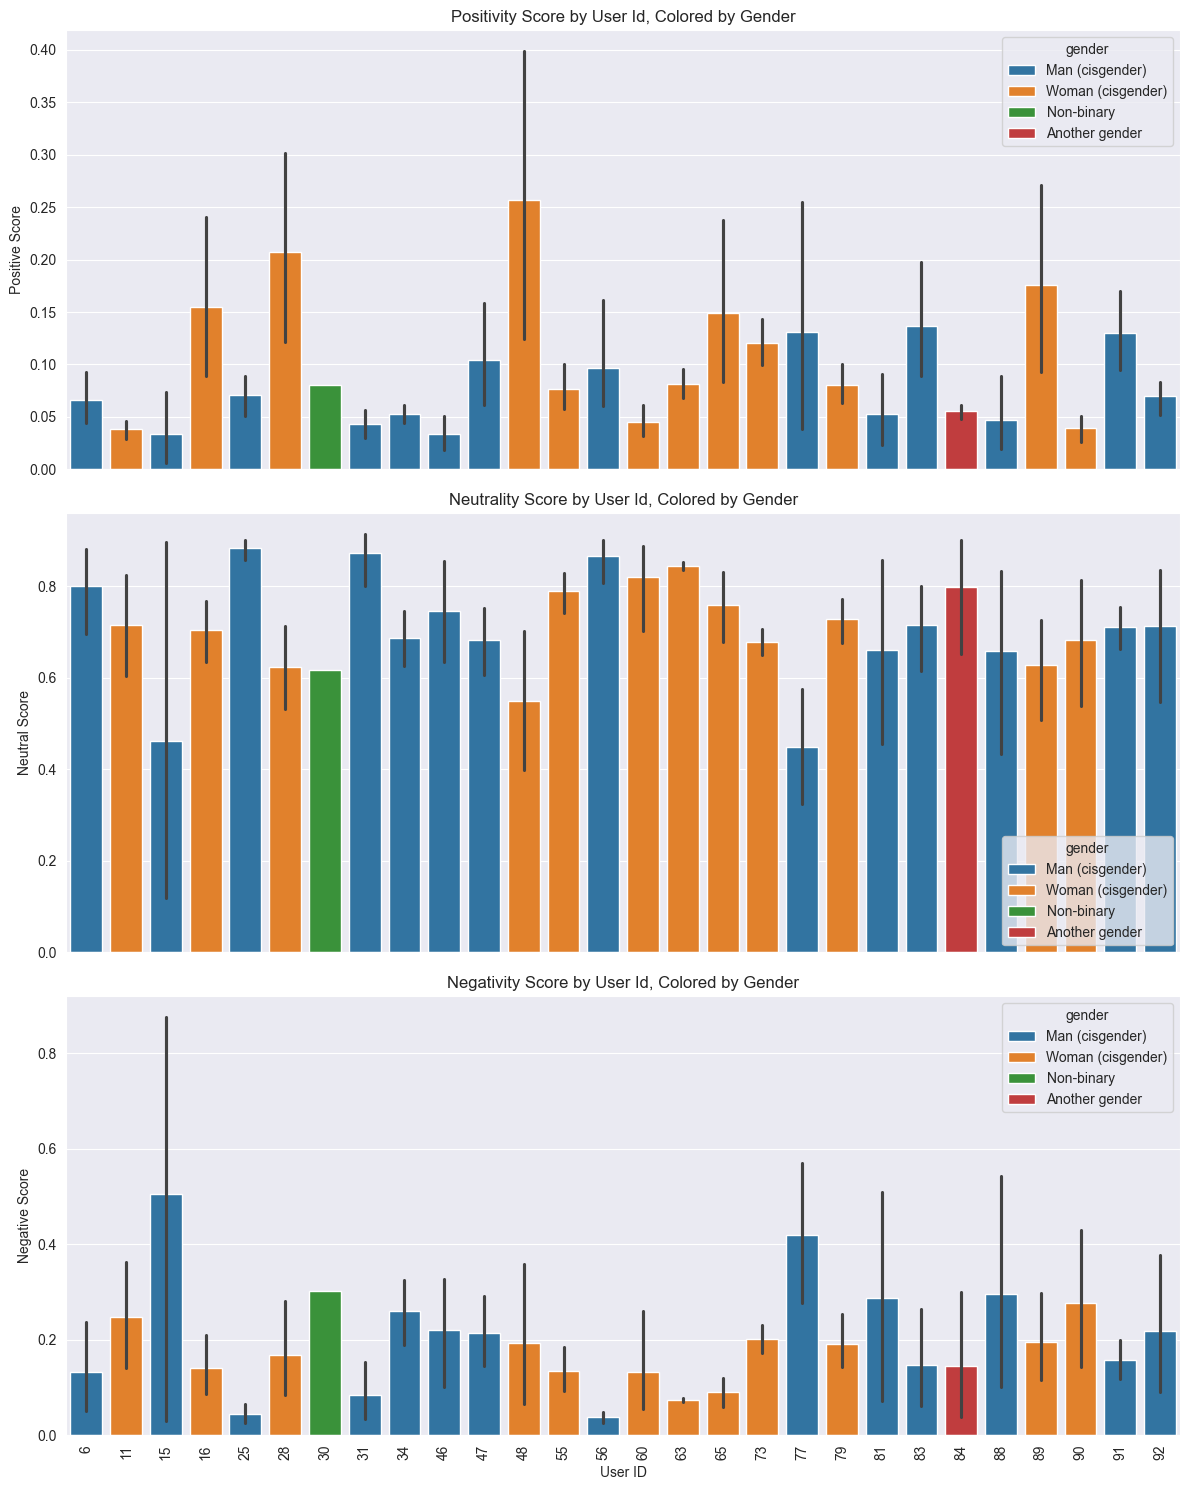

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

score_types = ['positive', 'neutral', 'negative']
titles = ['Positivity Score', 'Neutrality Score', 'Negativity Score']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

for i, (score, title) in enumerate(zip(score_types, titles)):
    sns.barplot(
        data=prompts,
        x='user_id',
        y=score,
        hue='gender',
        dodge=False,
        ax=axes[i]
    )
    axes[i].set_ylabel(f'{score.capitalize()} Score')
    axes[i].set_title(f'{title} by User Id, Colored by Gender')
    axes[i].set_xlabel('')  # Only label x-axis on bottom plot

axes[2].set_xlabel('User ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Average per gender on prompt base

In [11]:
mean_gender_scores = prompts.groupby('gender')[['negative', 'neutral', 'positive']].mean().reset_index()
mean_gender_scores

,gender,negative,neutral,positive
0,Another gender,0.145738,0.798971,0.055292
1,Man (cisgender),0.214496,0.689890,0.095614
2,Non-binary,0.301696,0.617728,0.080577
3,Woman (cisgender),0.188702,0.690359,0.120939


### T-test (this is not very clean, since samples cannot be assumed idependent)

In [12]:
from helpers.stats import run_t_test_on_gender

run_t_test_on_gender(prompts, 'positive')
run_t_test_on_gender(prompts, 'neutral')
run_t_test_on_gender(prompts, 'negative')

T-statistic: -2.1557, p-value: 0.0315
T-statistic: -0.0259, p-value: 0.9793
T-statistic: 1.3925, p-value: 0.1644


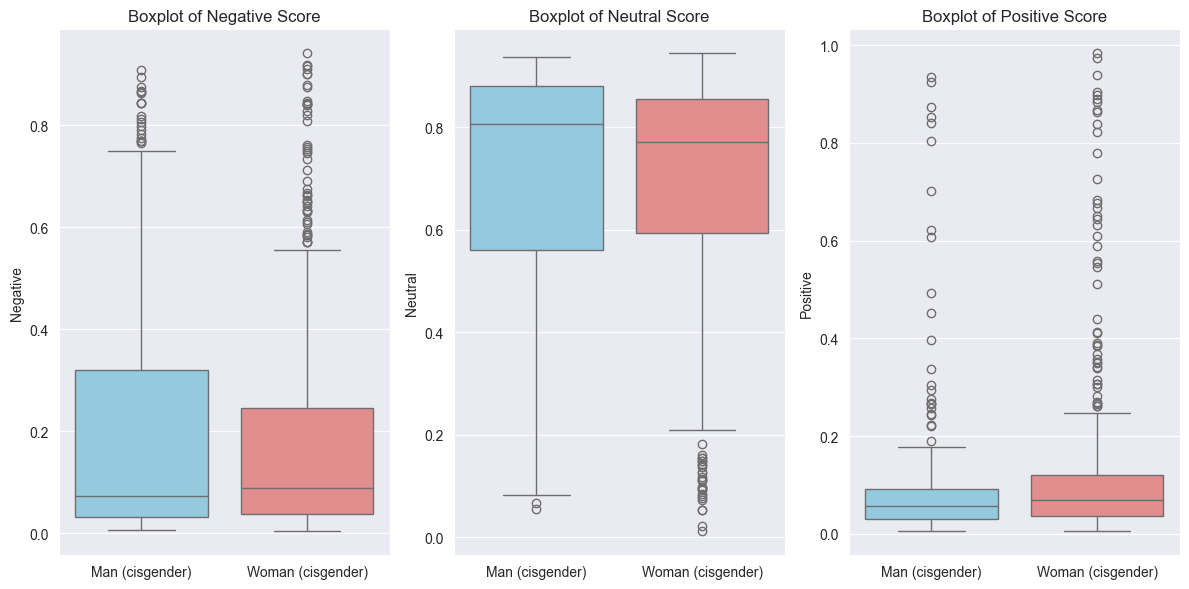

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered = prompts[prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]
score_types = ['negative', 'neutral', 'positive']

plt.figure(figsize=(12, 6))

for i, score in enumerate(score_types):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        x='gender',
        y=score,
        hue='gender',
        data=filtered,
        palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'},
        legend=False
    )
    plt.title(f'Boxplot of {score.capitalize()} Score')
    plt.xlabel('')
    plt.ylabel(score.capitalize())
    plt.legend([],[], frameon=False)  # Remove the redundant legend

plt.tight_layout()
plt.show()

### Mixed Effect model
- Coefficient for `Intercept` (baseline group)
- Coefficient for `gender` (difference from baseline)
- Estimate for random effect (variance between users)
- Standard errors and p-values for inference


In [14]:
import statsmodels.formula.api as smf

# 'positive' is the dependent variable
# 'gender' is the fixed effect
# 'user_id' is the grouping variable (random effect)

# Formula: positive ~ gender + (1 | user_id)
# In statsmodels, the grouping variable is specified as 'groups'

filtered = prompts[prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]
model = smf.mixedlm("positive ~ gender", data=filtered, groups=filtered["user_id"])
result = model.fit()
print(result.summary())
filtered


               Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     positive
No. Observations:       753         Method:                 REML    
No. Groups:             26          Scale:                  0.0250  
Min. group size:        2           Log-Likelihood:         303.8541
Max. group size:        238         Converged:              Yes     
Mean group size:        29.0                                        
--------------------------------------------------------------------
                            Coef. Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                   0.088    0.017 5.116 0.000  0.054  0.122
gender[T.Woman (cisgender)] 0.036    0.023 1.546 0.122 -0.010  0.082
Group Var                   0.002    0.006                          



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,negative,neutral,positive
0,1,1,user,"parsing data from python iterator, how it coul...",parsing data from python iterator how it could...,,,Man (cisgender),6,en,0.029543,0.886627,0.083830
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en,0.020289,0.916682,0.063029
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,0.289665,0.645016,0.065319
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,0.511837,0.444185,0.043978
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en,0.063254,0.869137,0.067609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,724,31,user,import pandas as pd\nimport numpy as np\nfrom ...,Please replace my retrieval pipeline here with...,import pandas as pd\nimport numpy as np\nfrom ...,You are tasked with separating user prompts in...,Man (cisgender),92,en,0.191832,0.747300,0.060868
756,726,31,user,"please update my code accordingly, no comments...",please update my code accordingly no comments ...,,,Man (cisgender),92,en,0.149495,0.762197,0.088308
757,1131,54,user,import pandas as pd\nimport numpy as np\nfrom ...,I want to tune optimal thresholds Currently I ...,import pandas as pd\nimport numpy as np\nfrom ...,The narratives list looks like this:\nnarrativ...,Man (cisgender),92,en,0.511362,0.405478,0.083159
758,1532,71,user,"from transformers import AutoTokenizer, AutoMo...",I want to use an LLM for listwise reranking in...,"from transformers import AutoTokenizer, AutoMo...",,Man (cisgender),92,en,0.203858,0.757606,0.038536


- **None of the coefficients are statistically significant** (as all p-values > 0.05). This suggests no strong evidence that gender explains differences in the outcome, after accounting for per-user randomness.

- The outcome **does not differ significantly between genders** after accounting for repeated measurements for each user.
- Most of the variation in scores is **not explained by gender**.
- There is a **small amount of variation** between the different user groups (clustered at ). `user_id`
